In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=np.random.rand(1000,3)

In [5]:
data=pd.DataFrame(data)
data.columns =[ 'x1', 'x2', 'x3']

In [6]:
data['y']=[5*x1+3*x2+1.5*x3+6 for x1,x2,x3 in zip(data['x1'],data['x2'],data['x3'])]

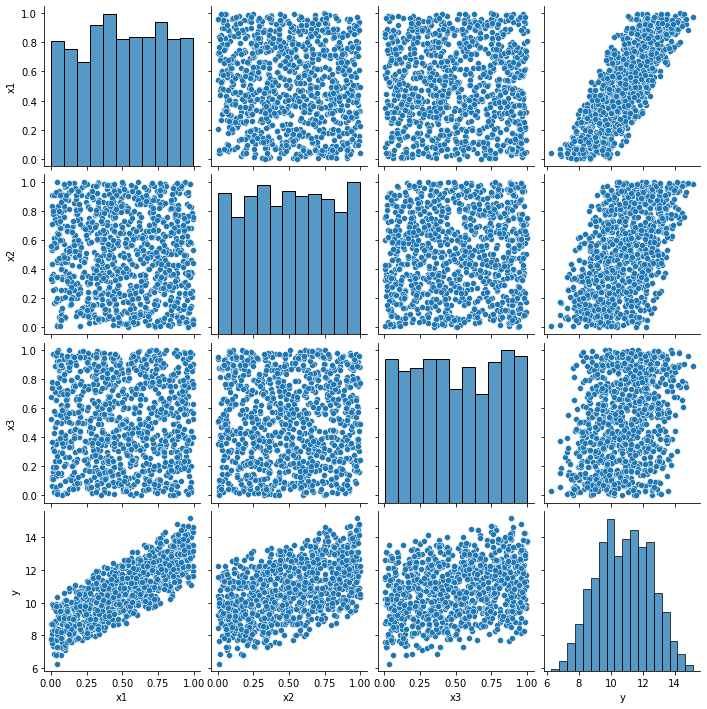

In [7]:
sns.pairplot(data)

In [8]:
data.insert(0,'ones',1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:,0:4], data.iloc[:,3:4], test_size=0.33, random_state=42)

In [10]:
def cost(theta,x,y):
    theta=np.matrix(theta)
    x=np.matrix(x)
    y=np.matrix(y)
    cst=np.power((x*theta.T)-y,2)
    return np.sum(cst)/(2*len(x))

In [16]:
def gredient(theta,x,y,rate,itret):
    theta=np.matrix(theta)
    x=np.matrix(x)
    y=np.matrix(y)
    temp=np.matrix(np.zeros(theta.shape))
    param=int(theta.ravel().shape[1])
    grad=np.zeros(param)
    for i in range(itret):
        error=(x*theta.T)-y
        for j in range(param):
            term = np.multiply(error,x[:,j])
            temp[0,j]=theta[0,j]-((rate/len(x))* np.sum(term))
        grad=temp
    return grad

In [17]:
theta=np.zeros(4)
theta=gredient(theta,X_train,y_train,0.6,500)
cost_train=cost(theta,X_train,y_train)
print(theta)
cost_train

[[0.29771523 0.14922898 0.15381618 0.20008193]]


0.031300328177571855

In [21]:
def predict(theta,x):
    theta=np.matrix(theta)
    print(theta)
    print(theta.shape)
    return[theta[0,0]+theta[0,1]*x1+theta[0,2]*x2+theta[0,3]*x3 for
           x1,x2,x3 in zip(x['x1'],x['x2'],x['x3'])]

In [22]:
predictions=predict(theta,X_test)
predictions

[[0.29171646 0.14909024 0.1455389  0.19180944]]
(1, 4)


[0.6167447124721738,
 0.5399391239118064,
 0.4962910274233801,
 0.5195719173185529,
 0.6967222845444756,
 0.6836600023220294,
 0.5246553152328515,
 0.4960883797115413,
 0.47203165433929833,
 0.40583284630751615,
 0.6101497066528286,
 0.5998975755948767,
 0.5419284219242217,
 0.4885911502605787,
 0.4232980521455321,
 0.545773568418452,
 0.5501821156877369,
 0.5926249111542953,
 0.47434142888493336,
 0.4417059062091401,
 0.6036396589833345,
 0.4216483165289179,
 0.4053352415949929,
 0.5108672076856635,
 0.632801803598404,
 0.6627806316556654,
 0.5847086989301467,
 0.5560060837320006,
 0.5875973475379115,
 0.47278849021824243,
 0.5742483413356266,
 0.5102298001593377,
 0.3805045238341799,
 0.358813040090735,
 0.5012008041366077,
 0.4830660427653479,
 0.41249689929397987,
 0.564136158202792,
 0.40499595995365695,
 0.580106125041431,
 0.4629440454109195,
 0.6231579150172524,
 0.7053806055633116,
 0.35375323452140617,
 0.5548191438272547,
 0.4763663066490329,
 0.4864486521133069,
 0.53902972

In [28]:
Accuracy =np.sum(np.power((np.matrix(y_test)-np.matrix(predictions)),2))
Accuracy

9833.745871383939

In [30]:
1-cost_train

0.9700396079572251